In [1]:
##### This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix,ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate,ShuffleSplit
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [3]:
import itertools

In [4]:
bsd= pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv')

In [5]:
a =bsd.select_dtypes(include =['float64','bool'])

In [6]:
col = a.columns.tolist()

In [7]:
len(col[:-2])

14

In [8]:
col = list(bsd.columns)

In [9]:
col

['HomePage',
 'HomePage_Duration',
 'LandingPage',
 'LandingPage_Duration',
 'ProductDescriptionPage',
 'ProductDescriptionPage_Duration',
 'GoogleMetric:Bounce Rates',
 'GoogleMetric:Exit Rates',
 'GoogleMetric:Page Values',
 'SeasonalPurchase',
 'Month_SeasonalPurchase',
 'OS',
 'SearchEngine',
 'Zone',
 'Type of Traffic',
 'CustomerType',
 'Gender',
 'Cookies Setting',
 'Education',
 'Marital Status',
 'WeekendPurchase',
 'Made_Purchase']

In [10]:
ab = itertools.combinations(col[:-2],13)

In [11]:
# y = train_data[['Made_Purchase']]

# train_data.columns

# train_data.drop(columns = [ 'Gender', 'Education', 'Marital Status','Made_Purchase'],axis = 1,inplace = True)

# train_data = pd.get_dummies( train_data)

# columns=train_data.dtypes.reset_index()

# columns

# # selected_columns = columns[columns[0]=='float64']['index'].values

# # selected_columns

# x_train=train_data
# y_train=y

# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# clf=GradientBoostingClassifier()

# rdf = RandomForestClassifier()

# x_train = x_train.fillna(0)

# clf.fit(x_train,y_train)

# from sklearn.metrics import accuracy_score

# accuracy_score(y_train, clf.predict(x_train))

# test_data = pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv')

# x_test=test_data

# x_test.drop(columns = [ 'Gender', 'Education', 'Marital Status'],axis = 1,inplace = True)

# x_test = pd.get_dummies( x_test)

# x_test = x_test.fillna(0)

# prediction=clf.predict(x_test)

In [12]:
train_data = bsd.copy()

In [13]:
def pre_process(df1,a):
#     df.drop(columns = ['Month_SeasonalPurchase','HomePage', 'HomePage_Duration', 'LandingPage','CustomerType', 'Gender',
#        'Education', 'Marital Status','OS', 'SearchEngine', 'Zone'],inplace = True)
#     df= df.select_dtypes(include =['float64','bool'])
    df = df1.copy()
    df = df[a]
    cat_imp = SimpleImputer(strategy="mean")
    std = StandardScaler()
    df = pd.get_dummies(df)
    df = cat_imp.fit_transform(df)
#     df = std.fit_transform(df)
    return df

In [14]:
def pre_process_1(df1):
#     df.drop(columns = ['Month_SeasonalPurchase','HomePage', 'HomePage_Duration', 'LandingPage','CustomerType', 'Gender',
#        'Education', 'Marital Status','OS', 'SearchEngine', 'Zone'],inplace = True)
#     df= df.select_dtypes(include =['float64','bool'])
    df = df1.copy()
    df = df[['ProductDescriptionPage_Duration', 'GoogleMetric:Exit Rates','GoogleMetric:Page Values']]
    cat_imp = SimpleImputer(strategy="mean")
    std = StandardScaler()
    df = cat_imp.fit_transform(df)
    df = std.fit_transform(df)
    return df

In [15]:
y_1 = train_data.Made_Purchase

In [16]:
train_data.drop(columns = ['Made_Purchase'], inplace = True)

In [17]:
# xtr,xts,ytr,yts = train_test_split(train_data,y_1,test_size = 0.2)

In [18]:
pre_data = pre_process_1(train_data)
# xts = pre_process(xts)

In [19]:
rdf = RandomForestClassifier(random_state=1)
clf = GradientBoostingClassifier(random_state=1)
adc = AdaBoostClassifier(random_state=1 ,n_estimators = 50,learning_rate=0.5)
lg = LogisticRegression(random_state=1)

In [20]:
# rdf.fit(pre_data,ytr)
# clf.fit(pre_data,ytr)
# adc.fit(pre_data,ytr)

In [21]:
cv = ShuffleSplit( test_size = 0.2, random_state = 1)

In [22]:
def train_classifier(estimator, x_tr,y_tr,cv,name):
    estimator.fit(x_tr,y_tr)
    cross_train_score = cross_val_score(estimator,x_tr,y_tr, cv = cv, scoring='f1_macro')
    return (f'f1 score {cross_train_score.mean():3f} and std of {cross_train_score.std():3f}')

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
# for a in ab:
#     print(a)

In [25]:
ab = itertools.combinations(col[:-2],2)

In [26]:
# l =[]
# mas = 0
# for a in ab:
#     a = list(a)
# #     print('----------')
# #     print(a)
#     adc.fit(pre_process(bsd,a),y_1)
#     l.append(f1_score(y_1,adc.predict(pre_process(bsd,a))))
#     rdf.fit(pre_process(bsd,a),y_1)
#     l.append(f1_score(y_1,rdf.predict(pre_process(bsd,a))))
#     clf.fit(pre_process(bsd,a),y_1)
#     l.append(f1_score(y_1,clf.predict(pre_process(bsd,a))))
#     if max(l)>mas:
#         print(a)
#         mas = max(l)
#         print(mas)
# print('-----', max(l))
#     r = train_classifier(rdf,pre_process(bsd,a),y_1,cv,'nana')


In [27]:
train_classifier(adc,pre_data,y_1,cv,'nana')

'f1 score 0.573853 and std of 0.008402'

In [28]:
def evoluation(estimator,x_ts,y_ts):
    y_p = estimator.predict(x_ts)
    print(confusion_matrix(y_ts,y_p))
    conf_mat = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_ts,y_p))
    conf_mat.plot()
    plt.title('confusion matrix')
    plt.show()

In [29]:
rdf.fit(pre_data,y_1)

RandomForestClassifier(random_state=1)

[[8247  818]
 [2264 3402]]


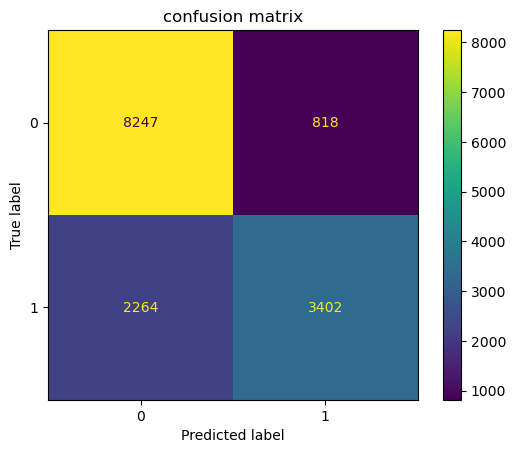

In [30]:
evoluation(rdf,pre_data,y_1)

In [31]:
adc.fit(pre_data,y_1)

AdaBoostClassifier(learning_rate=0.5, random_state=1)

In [32]:
f1_score(y_1,rdf.predict(pre_data))

0.6882460044507384

In [33]:
test_data = pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv')

In [34]:
x_test = pre_process_1(test_data)

In [35]:
prediction=rdf.predict(x_test)

In [36]:
submission=pd.DataFrame(columns=['id','Made_Purchase'])

submission['id']=[i for i in range(len(prediction))]

submission.Made_Purchase = prediction

submission.to_csv('submission.csv',index=False)